# Descripción del Proyecto

Trabajamos para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
(Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.)
El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

Descripción de datos

- Name (Nombre)
- Platform (Plataforma)
- Year_of_Release (Año de lanzamiento)
- Genre (Género)
- NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
- EU_sales (ventas en Europa en millones de dólares estadounidenses)
- JP_sales (ventas en Japón en millones de dólares estadounidenses)
- Other_sales (ventas en otros países en millones de dólares estadounidenses)
- Critic_Score (máximo de 100)
- User_Score (máximo de 10)
- Clasificación (ESRB)

Es posible que los datos de 2016 estén incompletos.

# Paso 1.
Comencemos importando las librerías y abriendo el archivo de datos para estudiar la información general

In [1]:
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from scipy.stats import levene

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
games = pd.read_csv('/datasets/games.csv')

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Paso 2.
**Prepara los datos**

Primero, vamos a reemplazar los nombres de las columnas, colocándolos en minúsculas.

In [6]:
columns = games.columns
games.set_axis(columns.str.lower(), axis='columns', inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Veamos primero los valores ausentes en esta columna, así como el porcentaje del total que representan.

In [7]:
games["year_of_release"].isna().sum()

269

In [8]:
year_len = 16715
year_nan = 269
year_nan_rate = year_nan / year_len

print(f"El porcentaje de valores nulos es: {year_nan_rate:.0%}")
print()

El porcentaje de valores nulos es: 2%



Vemos que, si bien es un porcentaje pequeño, son filas que pueden tener información valiosa referente a la plataforma, genero y ventas del juego. Por eso, en lugar de eliminar esas filas, vamos a rellenar sus valores ausentes con la media del año según la plataforma.

In [9]:
def fill_year(row):
    platform = row['platform']
    year_of_release = row['year_of_release']
    
    if pd.isna(year_of_release):
        return games[games['platform']==platform]['year_of_release'].mean()
    return year_of_release

games['year_of_release'] = games.apply(fill_year, axis=1)
games['year_of_release'].isna().sum()

0

Ahora que no tenemos valores ausentes, cambiamos los tipos de datos de la columna year_of_release de float al tipo int. Esto lo hacemos con la intención de facilitar el análisis más adelante, cuando determinaremos las ventas por año.

In [10]:
games["year_of_release"] = games["year_of_release"].astype("int64")

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Al usar el método info, podemos ver que varias columnas tienen valores ausentes. Vamos a revisar primero los valores ausentes en la columna user_score

In [12]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
9.6       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [13]:
games.loc[games.loc[:,'user_score'] == "tbd"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Hay una gran cantidad de valores con la calificación 'tbd', que significa "to be determined" (a determinar). Creemos que la razón de esto es que no se ha realizado aún un registro formal de la calificación de los usuarios por parte de las plataformas o de algún ente encargado de tal tarea en el rubro. Al no tener una calificación definida aún, manejaremos estos casos como si tuvieran por calificación con un valor improbable como -9.9. Vamos a cambiar a -9.9 el valor de las filas con calificación 'tbd' y las filas con valores ausentes.

In [14]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = -9.9
games['user_score'] = games['user_score'].fillna(-9.9)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-9.9,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-9.9,NaN


Ahora que no tenemos valores ausentes en esta columna, vamos a convertir los datos de object a float.

In [15]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-9.9,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-9.9,NaN


In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


vamos a revisar las filas que aún tienen valores ausentes con más detalle, haciendo una tabla filtrada solo con las filas en las que hay algún valor ausente.

In [17]:
games_null = games[games.isna().any(1)]

games_null_rate = len(games_null) / len(games)

print(f"El porcentaje de valores nulos es: {games_null_rate:.0%}")
print()

games_null.info()

El porcentaje de valores nulos es: 52%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8661 entries, 1 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8659 non-null   object 
 1   platform         8661 non-null   object 
 2   year_of_release  8661 non-null   int64  
 3   genre            8659 non-null   object 
 4   na_sales         8661 non-null   float64
 5   eu_sales         8661 non-null   float64
 6   jp_sales         8661 non-null   float64
 7   other_sales      8661 non-null   float64
 8   critic_score     83 non-null     float64
 9   user_score       8661 non-null   float64
 10  rating           1895 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 812.0+ KB


Podemos ver que en todo el DataFrame, hay 8661 filas que tienen al menos un valor nulo. Podemos ver también que, la mayoría de los valores nulos, están en la columna critic_score y rating, respectivamente. Esto representa el 52% de nuestros datos, lo cual es un porcentaje muy alto. Según el mismo criterio que usamos para respetar los valores en la columna user_score, no eliminaremos las filas con valores ausentes ni rellenaremo estos.

Vamos a revisar las filas donde el nombre del juego está ausente.

In [18]:
games_slice1 = games.query("name.isna()")
games_slice1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,-9.9,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,-9.9,NaN


Vemos que los valores ausentes en la columna name son los mismos de la columna genre. Vamos a hacer una taba filtrada en la que la plataforma sea GEN y el año de lanzamiento 1993, para ver si podemos ver algún patrón que nos de una idea para rellenar estos valores

In [19]:
games_slice2 = games.query("platform == 'GEN' and year_of_release == 1993")
games_slice2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,-9.9,NaN
7885,Shining Force II,GEN,1993,Strategy,0.00,0.00,0.19,0.00,NaN,-9.9,NaN
8893,Super Street Fighter II,GEN,1993,Fighting,0.00,0.00,0.15,0.00,NaN,-9.9,NaN
11986,Ecco: The Tides of Time,GEN,1993,Adventure,0.00,0.00,0.07,0.00,NaN,-9.9,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,-9.9,NaN
12264,Streets of Rage 3,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,-9.9,NaN
12984,Dynamite Headdy,GEN,1993,Platform,0.00,0.00,0.05,0.00,NaN,-9.9,NaN
13343,Beyond Oasis,GEN,1993,Role-Playing,0.00,0.00,0.05,0.00,NaN,-9.9,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,-9.9,NaN


Vemos que todos los nombres de los juegos de esta plataforma y con ese año de lanzamiento en nuestra tabla son diferentes. Además, realizamos una búsqueda por internet en diferentes sitios de videojuegos, siendo el más completo gamesdatabase (https://www.gamesdatabase.org/list.aspx?DM=0&system=sega_genesis&year=1993&sort=Game) y fueron muchos los juegos lanzados ese año, por lo que no tenemos forma de saber, y mucho menos sin el género, cuales pueden ser los nombres y géneros de esos dos juegos. Por esto, y como son tan pocas las filas con valores ausentes, vamos a eliminarlas

In [20]:
games.drop([659, 14244],axis=0)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-9.9,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-9.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-9.9,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-9.9,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-9.9,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-9.9,NaN


Ahora que tenemos listos los datos para trabajar, vamos a calcular las ventas totales para cada juego, y vamos a guardar el resultado en una nueva columna llamada total_sales.

In [21]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-9.9,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-9.9,NaN,31.38


# Paso 3.

**Analiza los datos**

Revisemos cuántos juegos fueron lanzados cada año, junto con sus respectivas ventas totales.

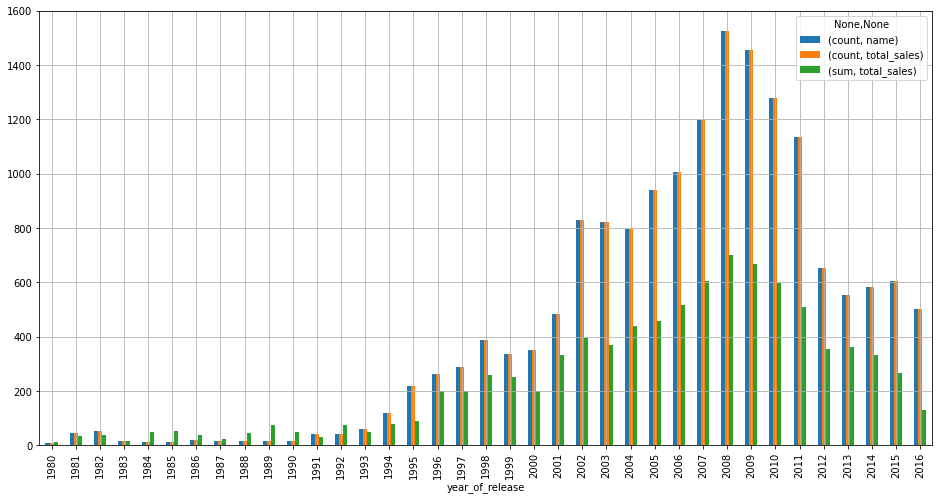

count                     sum
                 name total_sales total_sales
year_of_release                              
1980                9           9       11.38
1981               46          46       35.68
1982               53          53       39.38
1983               17          17       16.80
1984               14          14       50.35
1985               14          14       53.95
1986               21          21       37.08
1987               16          16       21.70
1988               15          15       47.21
1989               17          17       73.45
1990               16          16       49.37
1991               41          41       32.23
1992               43          43       76.16
1993               60          62       48.41
1994              121         121       79.23
1995              220         220       89.15
1996              263         263      199.15
1997              289         289      201.07
1998              389         389      260.26
1999              338         338      251.11
2000              350         350      201.66
2001              482         482      331.46
2002              829         829      394.97
2003              821         821      370.88
2004              796         796      440.89
2005              939         939      457.82
2006             1006        1006      517.71
2007             1197        1197      604.75
2008             1524        1524      699.45
2009             1456        1456      669.00
2010             1280        1280      598.44
2011             1136        1136      507.58
2012              653         653      355.84
2013              552         552      362.43
2014              582         582      331.79
2015              606         606      267.98
2016              502         502      129.94

In [22]:
games_count = games.pivot_table(
    index='year_of_release',
    values=["name", 'total_sales'],
    aggfunc=['count', 'sum'])

games_count.plot(kind="bar", grid=True, figsize=(16, 8))
plt.show()
games_count

Podemos sacar varias conclusiones interesantes de este resultado:
- A partir del año 1994, los nuevos lanzamientos de juegos crecieron de forma exponencial, al igual que las ventas totales.
- El peak de nuevos lanzamientos ocurrió en el año 2008, al igual que el peak de ventas. De ahí en adelante, comenzaron a disminuir los lanzamientos y ventas de nuevos juegos por año.
- En el año 2012, se redujo considerablemente el número de nuevos lanzamientos respecto al año anterior (casi 50% menos), y de ese año en adelante, la cantidad de nuevos juegos se "estabilizó" en un rango entre 500 y 600 nuevos lanzamientos por año aproximadamente. Sin embargo, las ventas por año continúan disminuyendo.

Veamos cómo varían las ventas de una plataforma a otra.

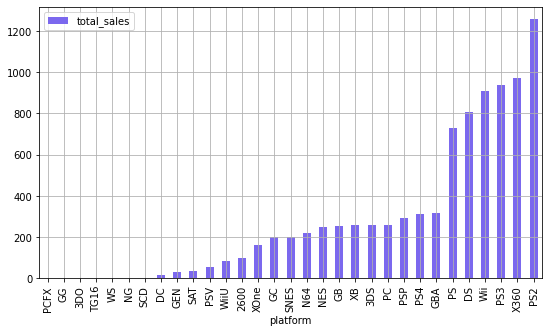

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [23]:
games_platform = games.pivot_table(
    index='platform',
    values="total_sales",
    aggfunc='sum').sort_values(by='total_sales')

games_platform.plot(kind="bar", grid=True, figsize=(9, 5), color='mediumslateblue')
plt.show()
games_platform.sort_values(by='total_sales', ascending=False)

Podemos ver que las plataformas con mayor cantidad de ventas totales son PS2, X360, PS3 y Wii en ese orden. Vamos a construir una distribución para estas plataformas basadas en las ventas totales por año

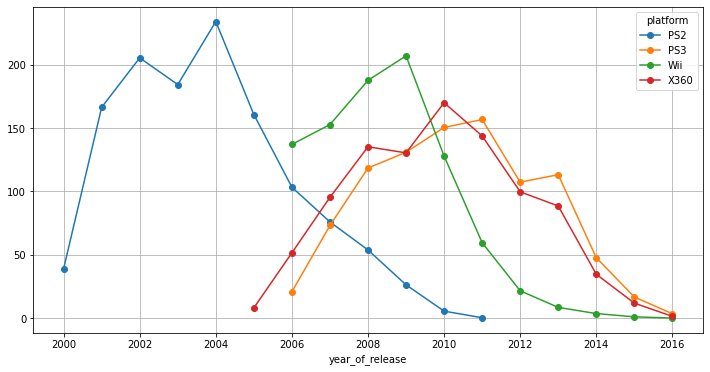

In [24]:
top_sales = games.query('platform in ("PS2", "X360", "PS3", "Wii")')

# top_sales.hist('year_of_release', bins=15)

sales = top_sales.pivot_table(
    index='year_of_release',
    values="total_sales",
    columns='platform',
    aggfunc='sum').plot(style='o-', grid=True, figsize=(12, 6))

A partir de esta gráfica, podemos sacar las siguientes conclusiones:
- La plataforma PS2 tuvo una vida de 11 años.
- La plataforma PS2 tuvo su nivel máximo de ingresos a 4 años de su lanzamiento
- PS3 tardó 5 años en alcanzar su máximo de ingresos
- Wii logró su máximo de ingresos en 3 años, para luego ir decreciendo
- X360 logró su máximo de ingresos a los 5 años de su lanzamiento

Las plataformas líderes en ventas son la PS2 y Wii. Si bien solían ser populares, en el 2016 ya no tienen ventas, apesar de haber sido las que alcanzaron los mayores ingresos anuales respecto a todas las plataformas.

Podemos ver un claro patrón en el que, las plataformas, luego de su lanzamiento, tienen un período de crecimiento de 5 años en el que incrementan su popularidad e ingresos. Luego de esto, sus ventas comienzan a reducir progresivamente hasta desaparecer
En promedio, su vida útil es de uos 10 años

Pudimos ver en el análisis de los nuevos lanzamientos por año, fue apartir del año 1994 cuando empezó a crecer exponencialmente la industria. Vamos a revisar el período desde esa fecha a la actualidad con el fin de determinar el rango más relevante para nuestro estudio.

<AxesSubplot:xlabel='year_of_release'>

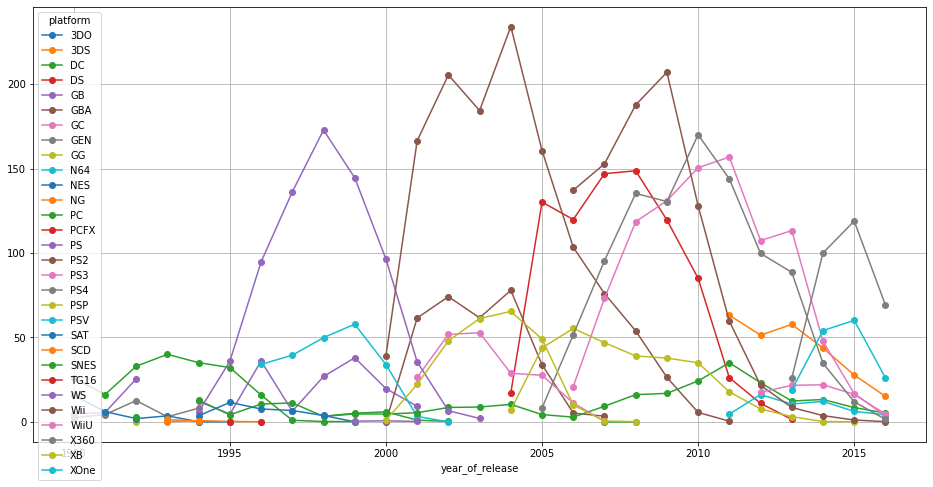

In [25]:
games.query('year_of_release >= 1990').pivot_table(
    index='year_of_release',
    values='total_sales',
    columns='platform',
    aggfunc='sum').plot(style='o-', grid=True, figsize=(16,8))

Podemos ver en este gráfico tanto las ventas de cada plataforma como la vida útil de la misma, pero como hay tantos datos juntos cuesta un poco verlo con claridad. Vamos a construir gráficos individuales para cada plataforma

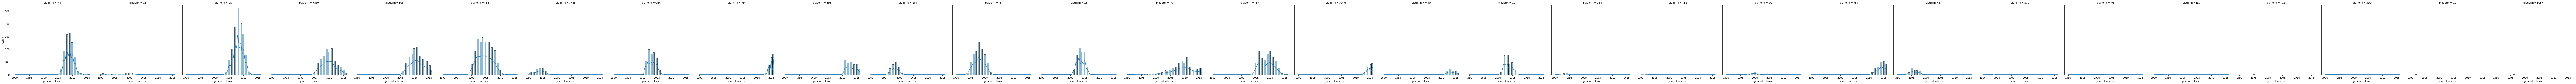

In [26]:
year_sales = games.query('year_of_release >= 1990')
sns.displot(data=year_sales, x='year_of_release', col='platform', kde=True)

Con estos gráficos, comprobamos las conclusiones anteriores en las que la vida útil de una plataforma es de 10 años en promedio. La única que se sale del patrón es la PC, lo cuál tiene sentido porque se trata de los juegos desarrollados para computadoras, y no para una consola específica.

Con base en este resultado, vamos a elegir como rango de fechas relevantes desde el año 2012 en adelante, ya que si nuestro pronóstico debe ser para el año 2017, nos va a permitir elegir las plataformas que se encuentren en el ejor momento de su vida útil, que son sus primeros 5 años.

Hagamos un gráfico en este rango de fechas para elegir a las plataformas cque sean potencialmente más rentables

<AxesSubplot:xlabel='year_of_release'>

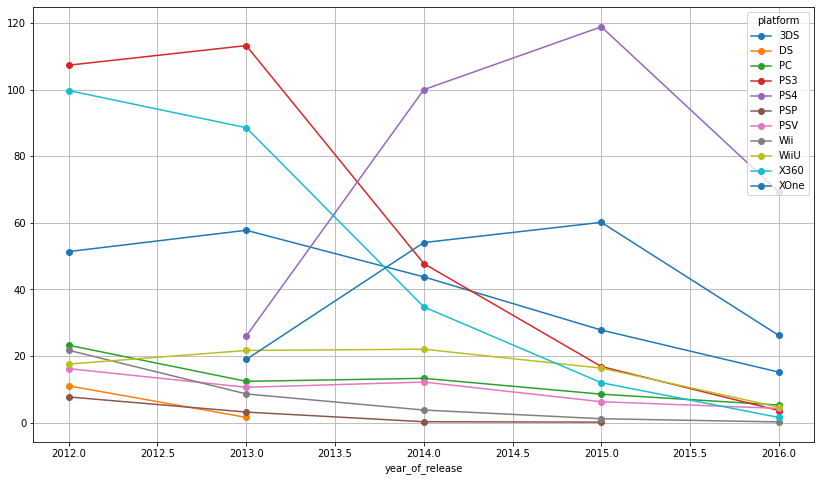

In [27]:
games_2012 = games.query('year_of_release >= 2012')

games_2012.pivot_table(
    index='year_of_release',
    values='total_sales',
    columns='platform',
    aggfunc='sum').plot(style='o-', grid=True, figsize=(14,8))

Podemos ver que las únicas plataformas "nuevas", son la PS4 y XOne, ambas lanzadas en el año 2013. Según el patrón observado, estas plataformas aún pueden alcanzar su máximo de ventas en los próximos dos años. Por este motivo, elegiremos a estas plataformas como las que tienen mayor probabilidad de rentabilidad, ya que todas las demás vienen presentando un descenso en sus ventas y ya no están en la etapa de su vida útil en la que se incrementan sus ingresos.

Vamos a crear una tabla filtrada con estas plataformas, para luego hacer diagramas de caja para apreciar las diferencias en las ventas globales de todos los juegos por plataforma, tomando en cuenta solo las más rentables

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

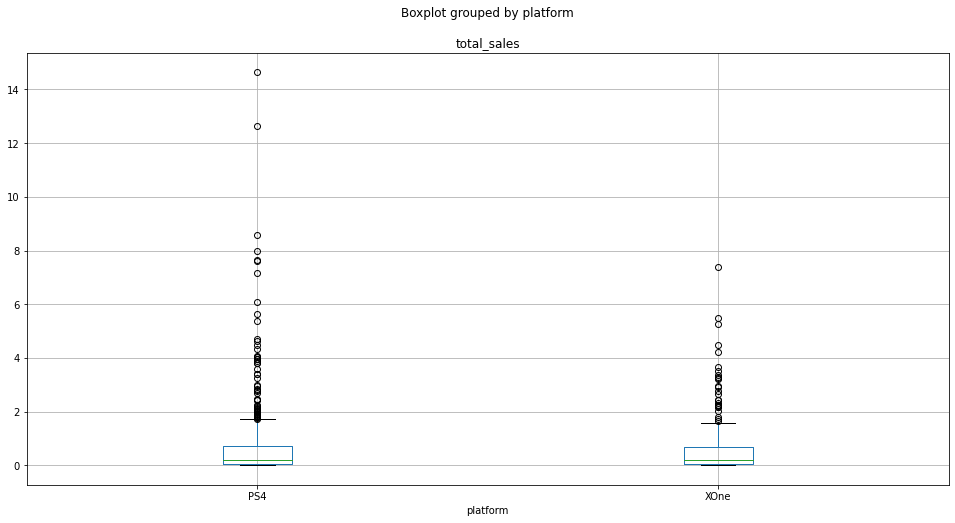

In [28]:
profit_platform = games_2012.query('platform == ("PS4", "XOne")')
profit_platform.boxplot(column='total_sales', by='platform', figsize=(16, 8))

A simple vista, podemos que decir que las ventas de la plataforma PS4 son mayores a las de XOne, vamos a hacer un análisis más detallado a cada una por separado, calculando también los valores mínimos y máximos, la media, mediana y el rango intercuartílico

First quartile: 0.060000000000000005
Third quartile: 0.73
IQR: 0.6699999999999999
Límite inferior: -0.9449999999999998
Límite superior: 1.7349999999999999


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,392.000000,392.000000,392.000000,392.000000,392.000000,252.000000,392.000000,392.000000
mean,2015.145408,0.277398,0.359923,0.040714,0.123342,72.091270,1.014796,0.801378
std,0.868181,0.583723,0.810843,0.069101,0.254825,12.485992,8.008380,1.609456
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,-9.900000,0.010000
25%,2015.000000,0.007500,0.000000,0.000000,0.010000,66.000000,-9.900000,0.060000
50%,2015.000000,0.060000,0.080000,0.010000,0.030000,73.000000,6.100000,0.200000
75%,2016.000000,0.260000,0.300000,0.050000,0.110000,80.000000,7.500000,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


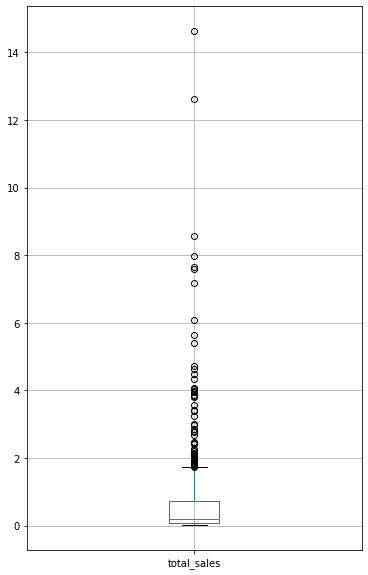

In [29]:
ps4_profit = profit_platform.query('platform == "PS4"')

ps4_profit.boxplot(column='total_sales', figsize=(6, 10))
Q1 = ps4_profit['total_sales'].quantile(0.25)
Q3 = ps4_profit['total_sales'].quantile(0.75)
IQR = Q3 - Q1
print("First quartile:", Q1)
print("Third quartile:", Q3)
print("IQR:", IQR)
print("Límite inferior:", Q1 - 1.5 * IQR)
print("Límite superior:", Q3 + 1.5 * IQR)

ps4_profit.describe()

First quartile: 0.060000000000000005
Third quartile: 0.73
IQR: 0.6699999999999999
Límite inferior: -0.9449999999999998
Límite superior: 1.7349999999999999


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,247.000000,247.000000,247.000000,247.000000,247.000000,169.000000,247.000,247.000000
mean,2014.951417,0.377004,0.208866,0.001377,0.057773,73.325444,2.200,0.645020
std,0.952995,0.630618,0.365306,0.005153,0.094221,12.953465,7.342,1.036139
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.000000,-9.900,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,66.000000,-9.900,0.060000
50%,2015.000000,0.120000,0.070000,0.000000,0.020000,76.000000,6.000,0.220000
75%,2016.000000,0.385000,0.220000,0.000000,0.060000,82.000000,7.200,0.685000
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,9.200,7.390000


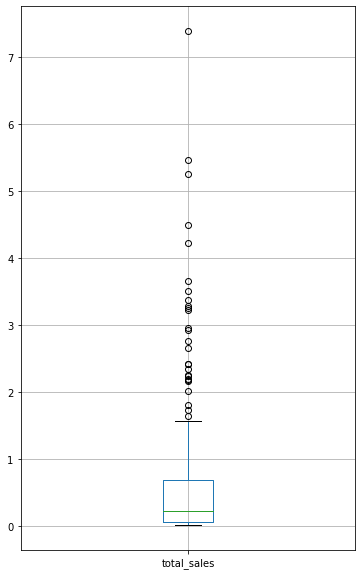

In [30]:
xone_profit = profit_platform.query('platform == "XOne"')

xone_profit.boxplot(column='total_sales', figsize=(6, 10))
Q1 = ps4_profit['total_sales'].quantile(0.25)
Q3 = ps4_profit['total_sales'].quantile(0.75)
IQR = Q3 - Q1
print("First quartile:", Q1)
print("Third quartile:", Q3)
print("IQR:", IQR)
print("Límite inferior:", Q1 - 1.5 * IQR)
print("Límite superior:", Q3 + 1.5 * IQR)

xone_profit.describe()

Efectivamente, podemos ver que las ventas máximas y promedio de PS4 son mayores a las de XOne. Sin embargo, las medianas de las ventas de ambas plataformas son prácticamente iguales. Esto nos hace pensar que lo que "dispara" las ventas totales de PS4 son los valores atipicos muy elevados. Veamos una muestra de ambas tablas para entender un poco más de que se tratan estos valores.

In [31]:
ps4_profit.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-9.9,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,-9.9,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [32]:
xone_profit.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,-9.9,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


Este resultado nos sirve para comparar las ventas de los mismos juegos en diferentes plataformas. Podemos ver que el valor atípico en la plataforma PS4 es por el juego Call of Duty: Black Ops 3, que tuvo un total de ventas superior a los 14 millones de dólares. Algo también interesante, es que en ambas plataformas los juegos con mayores ventas son los mismos: Call of Duty: Black Ops 3 y Grand Theft Auto V, sin embargo, las ventas en la plataforma PS4 son significativamente mayores a las de XOne en los mismos juegos. Podemos concluir entonces que la plataforma PS4 es más popular que XOne, lo que se puede apreciar en el siguiente gráfico.

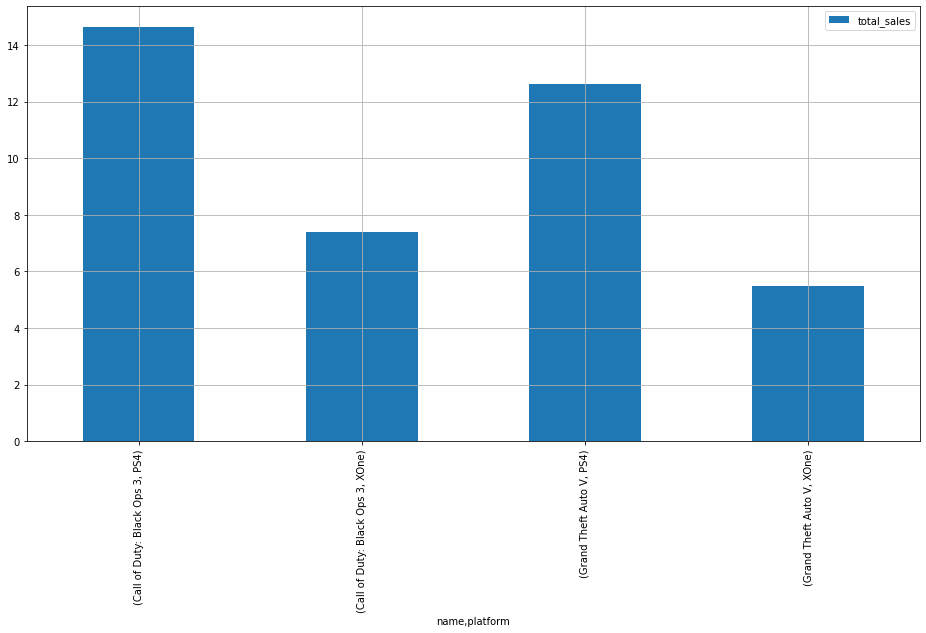

In [33]:
platform_compare = profit_platform.query('name == ("Call of Duty: Black Ops 3", "Grand Theft Auto V")').pivot_table(
    index=['name', 'platform'],
    values='total_sales',
    aggfunc='sum')

platform_compare.plot(kind="bar", grid=True, figsize=(16, 8))
plt.show()

Vamos a ver ahora cómo las reseñas de usuarios y críticos profesionales afectan las ventas de la plataforma PS4 (veremos esta primero por ser la más popular). haremos un gráfico de dispersión y vamos a calcular la correlación entre las reseñas y las ventas. Saca conclusiones. Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

0.40656790206178095


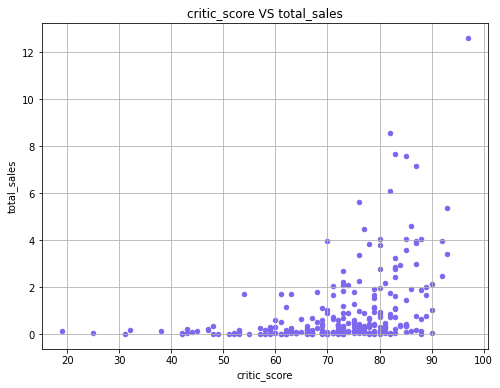

In [34]:
ps4_profit.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    figsize=(8, 6),
    grid=True,
    title='critic_score VS total_sales',
    color='mediumslateblue')

print(ps4_profit['critic_score'].corr(ps4_profit['total_sales']))

-0.031957110204556376


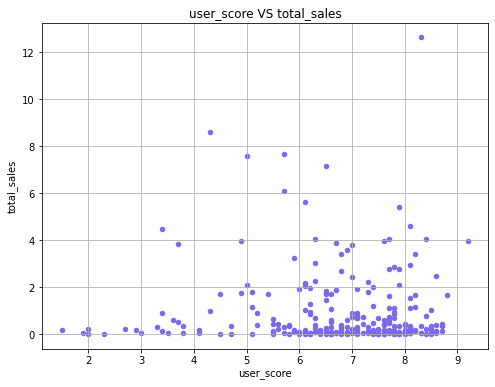

In [35]:
ps4_user_score_fix = ps4_profit.query('user_score >= 0')

ps4_user_score_fix.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    figsize=(8, 6),
    grid=True,
    title='user_score VS total_sales',
    color='mediumslateblue')

print(ps4_user_score_fix['user_score'].corr(ps4_user_score_fix['total_sales']))

Podemos ver que, en la plataforma PS4, hay una clara correlación positiva entre las ventas totales y las calificaciones de los críticos profesionales

En el caso de las calificaciones de los usuarios, podemos ver que la correlación es también negativa, pero no es tan marcada como con la calificación de los críticos profesionales (es apenas de -0.031). En ese sentido, diremos que la correlación no es fuerte.

Vamos a repetir el mismo análisis con la plataforma XOne para comparar los resultados

0.4169983280084017


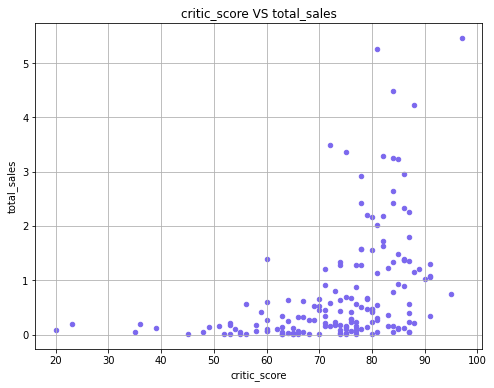

In [36]:
xone_profit.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    figsize=(8, 6),
    grid=True,
    title='critic_score VS total_sales',
    color='mediumslateblue')

print(xone_profit['critic_score'].corr(xone_profit['total_sales']))

-0.06892505328279414


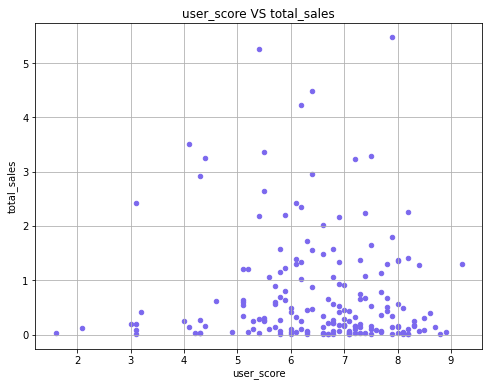

In [37]:
xone_user_score_fix = xone_profit.query('user_score >= 0')

xone_user_score_fix.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    figsize=(8, 6),
    grid=True,
    title='user_score VS total_sales',
    color='mediumslateblue')

print(xone_user_score_fix['user_score'].corr(xone_user_score_fix['total_sales']))

Podemos ver que en la plataforma XOne se repite el patrón y la correlación entre las críticas de usuarios profesionales y calificaciones de usuarios casi de forma muy similar.

Vamos ahora a darle un vistazo a la distribución general de los juegos por género. 

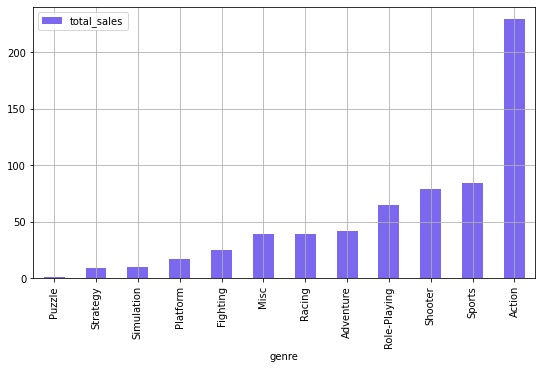

In [38]:
genre_review = profit_platform.pivot_table(
    index='genre',
    values="total_sales",
    aggfunc='count').sort_values(by='total_sales')

genre_review.plot(kind="bar", grid=True, figsize=(9, 5), color='mediumslateblue')
plt.show()

Podemos decir sin duda alguna que el género más rentable, y por mucho, es action, y podemos decir que es el más popular en ambas plataformas. Los géneros que le siguen en ventas son sports, shooter y role-playing. No podemos generalizar acerca de los géneros con ventas altas y bajas, ya que estas pueden variar dependiendo de la región y plataforma.

# Paso 4.

**Crea un perfil de usuario para cada región**

Para comenzar, vamos a determinar las cinco plataformas principales para cada región (NA, UE, JP).

,na_sales
platform,
PSP,0.13
DS,4.59
PSV,11.09
Wii,17.45
PC,19.12


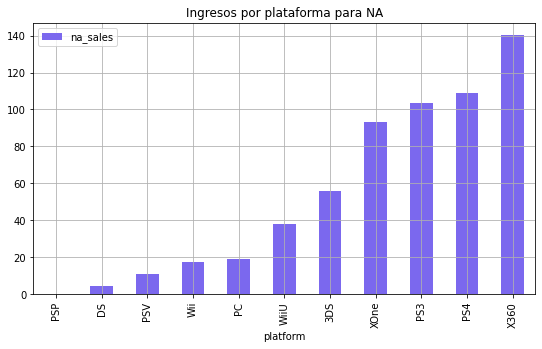

In [39]:
na_sales = games_2012.pivot_table(
    index='platform',
    values='na_sales',
    aggfunc='sum').sort_values(by='na_sales')

na_sales.plot(kind="bar", grid=True, figsize=(9, 5), color='mediumslateblue', title='Ingresos por plataforma para NA')
na_sales.head()

,eu_sales
platform,
PSP,0.42
DS,3.53
PSV,11.41
Wii,11.92
WiiU,25.13


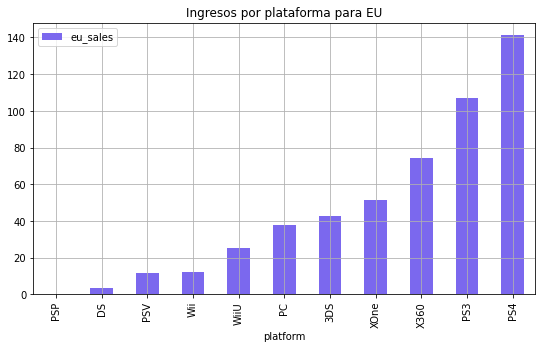

In [40]:
eu_sales = games_2012.pivot_table(
    index='platform',
    values='eu_sales',
    aggfunc='sum').sort_values(by='eu_sales')

eu_sales.plot(kind="bar", grid=True, figsize=(9, 5), color='mediumslateblue', title='Ingresos por plataforma para EU')
eu_sales.head()

,jp_sales
platform,
PC,0.00
XOne,0.34
X360,1.57
Wii,3.39
DS,3.72


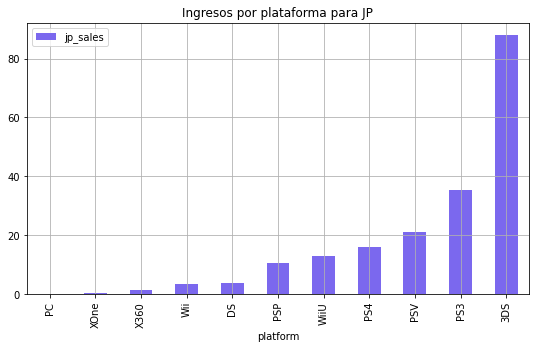

In [41]:
jp_sales = games_2012.pivot_table(
    index='platform',
    values='jp_sales',
    aggfunc='sum').sort_values(by='jp_sales')

jp_sales.plot(kind="bar", grid=True, figsize=(9, 5), color='mediumslateblue', title='Ingresos por plataforma para JP')
jp_sales.head()

 Podemos ver claramente las variaciones en las cuotas de mercado de cada región:
 - En NA, las cinco plataformas principales son: X360, PS4, PS3, XOne y 3DS
 - En EU, las cinco plataformas principales son: PS4, PS3, X360, XOne y 3DS
 - En JP, las cinco plataformas principales son: 3DS, PS3, PSV, PS4 y WiiU 

Veamos ahora cuáles son los géneros principales por región

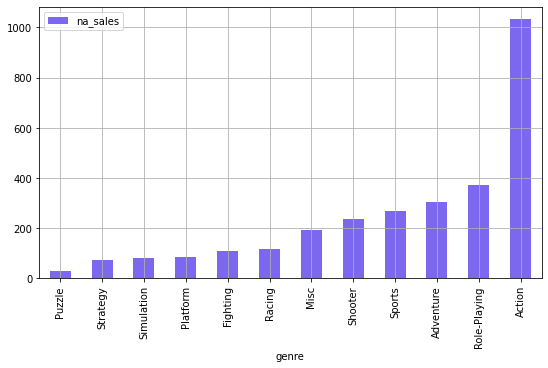

In [42]:
na_genre = games_2012.pivot_table(
    index='genre',
    values="na_sales",
    aggfunc='count').sort_values(by='na_sales')

na_genre.plot(kind="bar", grid=True, figsize=(9, 5), color='mediumslateblue')
plt.show()

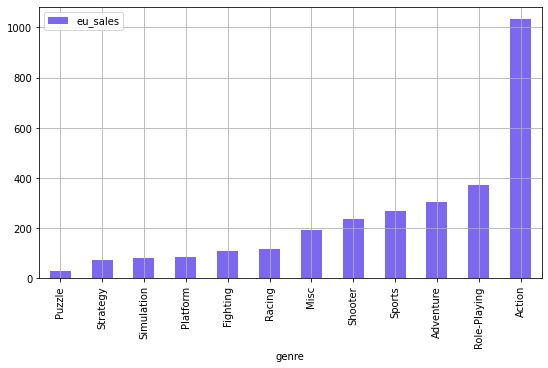

In [43]:
eu_genre = games_2012.pivot_table(
    index='genre',
    values="eu_sales",
    aggfunc='count').sort_values(by='eu_sales')

eu_genre.plot(kind="bar", grid=True, figsize=(9, 5), color='mediumslateblue')
plt.show()

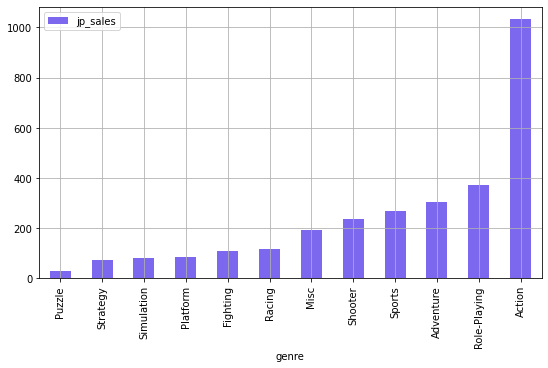

In [44]:
jp_genre = games_2012.pivot_table(
    index='genre',
    values="jp_sales",
    aggfunc='count').sort_values(by='jp_sales')

jp_genre.plot(kind="bar", grid=True, figsize=(9, 5), color='mediumslateblue')
plt.show()

Vemos que en la región NA, los cinco géneros principales son action, misc, sports, puzzle y racing.

Vemos que en la región UE los cinco géneros principales son action, strategy, sports, adventure y simulation.

Vemos que en la región JP, los cinco géneros principales son adventure, action, role-playing, misc y sports.

Revisemos si las clasificaciones de ESRB afectan a las ventas en regiones individuales

,na_sales
rating,
T,66.31
E10+,75.96
E,114.49
M,231.57


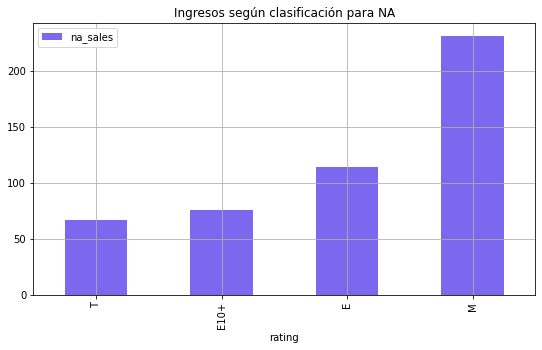

In [45]:
na_sales = games_2012.pivot_table(
    index='rating',
    values='na_sales',
    aggfunc='sum').sort_values(by='na_sales')

na_sales.plot(kind="bar", grid=True, figsize=(9, 5), color='mediumslateblue', title='Ingresos según clasificación para NA')
na_sales.head()

,eu_sales
rating,
T,53.01
E10+,55.56
E,113.05
M,193.96


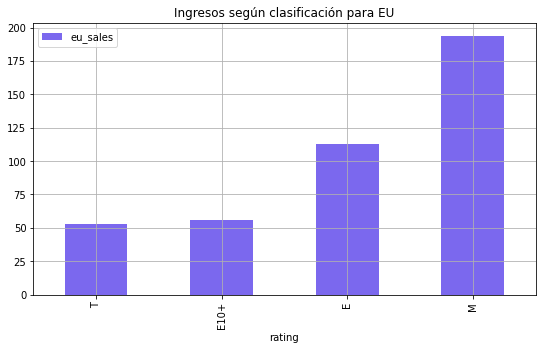

In [46]:
eu_sales = games_2012.pivot_table(
    index='rating',
    values='eu_sales',
    aggfunc='sum').sort_values(by='eu_sales')

eu_sales.plot(kind="bar", grid=True, figsize=(9, 5), color='mediumslateblue', title='Ingresos según clasificación para EU')
eu_sales.head()

,jp_sales
rating,
E10+,8.19
M,21.20
T,26.09
E,28.33


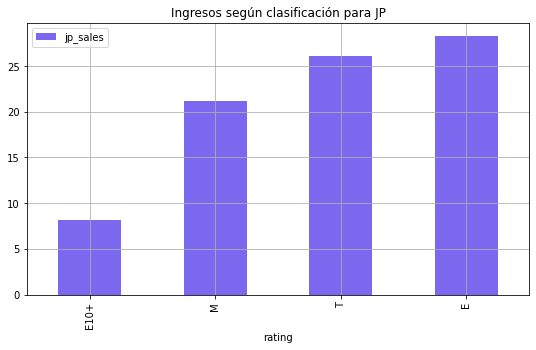

In [47]:
jp_sales = games_2012.pivot_table(
    index='rating',
    values='jp_sales',
    aggfunc='sum').sort_values(by='jp_sales')

jp_sales.plot(kind="bar", grid=True, figsize=(9, 5), color='mediumslateblue', title='Ingresos según clasificación para JP')
jp_sales.head()

Podemos apreciar que la clasificación de los juegos si hace una diferencia entre las diferentes regiones. En las regiones NA y EU, las clasificaciones con más ventas, ordenadas de mayor a menor, son M, E, E10+ y T. Por otro lado, en la región JP cambia el patrón, siendo la clasificación con más ventas E, seguida por T, M y E10+ respectivamente

# Paso 5.

**Prueba de hipótesis:**

## Hipótesis 1.

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. 

La hipótesis nula es que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales. Por lo tanto, la hipótesis alternativa es que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son iguales.

Formulamos la hipótesis nula y alternativa estructurándolas como hipótesis sobre la igualdad de las medias de dos poblaciones, ya que lo que buscamos hacer es comparar las medias de dos poblaciones estadísticas diferentes. Lo que buscamos estudiar es si la diferencia entre las medias es significativa o no, para decidir si rechazar o no la hipótesis nula.

Utilizaremos el método scipy.stats.ttest_ind(array1, array2, equal_var), estableciendo el parámetro equal_var en False, ya que las varianzas de las tablas no son iguales.

In [48]:
xone_user = games_2012.query('platform == "XOne" and user_score >= 0')
pc_user = games_2012.query('platform == "PC" and user_score >= 0')

xone_user_rate = xone_user['user_score']
pc_user_rate = pc_user['user_score']

print('Las calificaciones promedio de los usuarios para la plataforma XOne:', pd.Series(xone_user_rate).mean())
print('Las calificaciones promedio de los usuarios para la plataforma PC:', pd.Series(pc_user_rate).mean())

alpha = 0.05

results = st.ttest_ind(xone_user_rate, pc_user_rate, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

Las calificaciones promedio de los usuarios para la plataforma XOne: 6.521428571428572
Las calificaciones promedio de los usuarios para la plataforma PC: 6.4286407766990274
p-value: 0.5489537965134912
No rechazamos la hipótesis nula


Observamos que el p-valor resultante es de 0.54, resultando superior a alpha. Por tal motivo no rechazamos la hipótesis nula. Como conclusión, las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

## Hipótesis 2.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

La hipótesis nula es que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales. Por lo tanto, la hipótesis alternativa es que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son iguales.

Al igual que en la hipótesis anterior, esta segunda hipótesis nula y alternativa son hipótesis sobre la igualdad de las medias de dos poblaciones,ya que también buscamos estudiar es si la diferencia entre las medias de cada región es significativa o no, para decidir si rechazar o no la hipótesis nula.

Utilizaremos de nuevo el método scipy.stats.ttest_ind(array1, array2, equal_var), estableciendo el parámetro equal_var en False, ya que las varianzas de las tablas no son iguales.

In [49]:
action_score = games_2012.query('genre == "Action" and user_score >= 0')
sports_score = games_2012.query('genre == "Sports" and user_score >= 0')

action_score_rate = action_score['user_score']
sports_score_rate = sports_score['user_score']

print('Las calificaciones promedio de los usuarios para el género de acción:', pd.Series(xone_user_rate).mean())
print('Las calificaciones promedio de los usuarios para el género de deportes', pd.Series(pc_user_rate).mean())

alpha = 0.05

results = st.ttest_ind(action_score_rate, sports_score_rate, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

Las calificaciones promedio de los usuarios para el género de acción: 6.521428571428572
Las calificaciones promedio de los usuarios para el género de deportes 6.4286407766990274
p-value: 4.305337670692197e-20
Rechazamos la hipótesis nula


Observamos que el p-valor resultante es mínimo, de 4.30 a la -20, resultando menor a alpha. Por tal motivo rechazamos la hipótesis nula. Como conclusión, las calificaciones promedio de los usuarios para el género de acción y deportes no son iguales.

# Paso 6. 
**Conclusión general**

A partir de los resultados obtenidos, podemos concluir lo siguiente:
- A partir del año 1994, los nuevos lanzamientos de juegos y ventas totales crecieron de forma exponencial.
- El peak de nuevos lanzamientos y ventas totales ocurrió en el año 2008
- Del año 2008 en adelante, comenzaron a disminuir los lanzamientos y ventas totales de nuevos juegos por año.
- En el año 2012, se redujo considerablemente el número de nuevos lanzamientos respecto al año anterior.
- Aunque desde el año 2012 la cantidad de nuevos juegos por año se mantiene en un rango entre 500 y 600, las ventas por año continúan disminuyendo desde su máximo en el año 2008
- Las plataformas con mayor cantidad de ventas totales son PS2, X360, PS3 y Wii en ese orden.
- Se detectó un patrón en el que, las plataformas, luego de su lanzamiento, tienen un período de crecimiento de 5 años en el que incrementan su popularidad e ingresos. Luego de esto, sus ventas comienzan a reducir progresivamente hasta desaparecer
- El promedio de vida útil de una plataforma es de unos 10 años
- Las plataformas con mayor probabilidad de rentabilidad son la PS4 y XOne, ya que son las más recientes (ambas lanzadas en el año 2013)
- Las ventas máximas y promedio de PS4 son mayores a las de XOne.
- En ambas plataformas los juegos con mayores ventas son los mismos: Call of Duty: Black Ops 3 y Grand Theft Auto V
- Las ventas en la plataforma PS4 son significativamente mayores a las de XOne estoss juegos.
- La plataforma PS4 es más popular que XOne.
- En las plataformas PS4 y XOne, hay una correlación positiva entre las ventas totales y las calificaciones de los críticos profesionales.
- En el caso de las calificaciones de los usuarios, la correlación no es fuerte.
- El género más popular y rentable en ambas plataformas es action
- Los géneros que le siguen en ventas son sports, shooter y role-playing.
- En la región NA, las cinco plataformas principales son: X360, PS4, PS3, XOne y 3DS
- En la región EU, las cinco plataformas principales son: PS4, PS3, X360, XOne y 3DS
- En la región JP, las cinco plataformas principales son: 3DS, PS3, PSV, PS4 y WiiU 
- Vemos que en la región NA, los cinco géneros principales son action, misc, sports, puzzle y racing.
- Vemos que en la región UE los cinco géneros principales son action, strategy, sports, adventure y simulation.
- Vemos que en la región JP, los cinco géneros principales son adventure, action, role-playing, misc y sports.
- En las regiones NA y EU, las clasificaciones con más ventas son M, E, E10+ y T, respectivamente.
- En la región JP las clasificaciones con más ventas son E, T, M y E10+, respectivamente.

Con estos reultados, tenemos claros los patrones que determinan si un juego tendrá éxito o no. Los proyectos más prometedores serán los juegos de acción de la plataforma PS4, para los cuales se pueden planificar campañas publicitarias diferenciadas para los usuarios de cada región, en vista de que detectamos que sus comportamientos son diferentes.

En ese sentido, la campaña para 2017 debe estar enfocada en potenciar las ventas de las plataformas PS4 y XOne en todas las regiones.